CoGaDB Exploration Results
===========================

## Evaluation

### Imports:

In [1]:
%matplotlib inline

from exploration import *

### Load csv files:

In [2]:
logDirectory = os.path.join(os.getcwd(), "logs")
logDirectory

'/home/chris/projects/cogadb/code/benchmarks/exploration/analysis/logs'

In [3]:
logEntries = concatCSVFiles(logDirectory)

In [4]:
data = createPandasDataFrame(logEntries)

### The variants

In [5]:
filtered = data[(data.ExplorationMode == "Full Exploration")]

In [6]:
filtered = filtered[["Query", "Host", "DeviceType", "Device", "VariantTag", "Variant", "Median", "Mean", "Stdev"]]

In [7]:
filtered

,Query,Host,DeviceType,Device,VariantTag,Variant,Median,Mean,Stdev
8,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Fastest,coalesced-true-sequential,0.029986,0.030798,0.003627
9,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Variant,coalesced-false-sequential,0.032019,0.034239,0.005580
10,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Variant,sequential-false-sequential,0.032823,0.032808,0.003944
11,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Variant,sequential-true-sequential,0.033156,0.034265,0.004889
12,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Variant,coalesced-true-semaphore,0.242125,0.242091,0.002891
13,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Variant,sequential-false-semaphore,0.250340,0.250412,0.004720
14,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Variant,sequential-true-semaphore,0.250692,0.348592,0.113313
15,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Slowest,coalesced-false-semaphore,0.259071,0.259037,0.005145
24,grouped_aggregation_query_1,gpu-1,dgpu,Tesla K40m,Fastest,coalesced-true-atomic_workgroup,0.063449,0.063563,0.000235
25,grouped_aggregation_query_1,gpu-1,dgpu,Tesla K40m,Variant,coalesced-false-atomic_workgroup,0.064196,0.064413,0.000682


The number of variants:

In [8]:
filtered.groupby(["Query"]).apply(lambda group: len(group.Variant))

Query
grouped_aggregation_query_1                      24
projection-query-1-medium-selectivity            24
projection-query-2-high-selectivity              24
simple-aggregation-query-1-medium-selectivity     8
dtype: int64

### Selecting the fastest variants

In [9]:
fastest = filtered[(filtered.VariantTag=="Fastest")]

In [10]:
fastest.sort_values(by=["Query", "Host", "Device"])

,Query,Host,DeviceType,Device,VariantTag,Variant,Median,Mean,Stdev
8,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Fastest,coalesced-true-sequential,0.029986,0.030798,0.003627
24,grouped_aggregation_query_1,gpu-1,dgpu,Tesla K40m,Fastest,coalesced-true-atomic_workgroup,0.063449,0.063563,0.000235
132,projection-query-1-medium-selectivity,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Fastest,coalesced-true-serial_single_pass,0.049234,0.060475,0.025888
48,projection-query-1-medium-selectivity,gpu-1,dgpu,Tesla K40m,Fastest,coalesced-false-parallel_three_pass,0.032243,0.032713,0.001247
112,projection-query-2-high-selectivity,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Fastest,coalesced-false-serial_single_pass,0.044208,0.044225,0.003170
80,projection-query-2-high-selectivity,gpu-1,dgpu,Tesla K40m,Fastest,coalesced-false-parallel_global_atomic_single_...,0.015276,0.015808,0.002490
100,simple-aggregation-query-1-medium-selectivity,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,Fastest,sequential-false,0.034710,0.034204,0.002083
68,simple-aggregation-query-1-medium-selectivity,gpu-1,dgpu,Tesla K40m,Fastest,coalesced-true,0.008284,0.007916,0.001495


### Update the VariantTag

In [11]:
# Warning: Conflicts not handled so far
for item in fastest.itertuples():
    rowidx = (filtered.Query == item.Query) & (filtered.Host == item.Host) & (filtered.Variant == item.Variant)
    filtered.loc[rowidx, 'VariantTag'] = item.DeviceType + " optimized"

In [12]:
filtered.loc[fastest.index]

,Query,Host,DeviceType,Device,VariantTag,Variant,Median,Mean,Stdev
8,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,cpu optimized,coalesced-true-sequential,0.029986,0.030798,0.003627
24,grouped_aggregation_query_1,gpu-1,dgpu,Tesla K40m,dgpu optimized,coalesced-true-atomic_workgroup,0.063449,0.063563,0.000235
48,projection-query-1-medium-selectivity,gpu-1,dgpu,Tesla K40m,dgpu optimized,coalesced-false-parallel_three_pass,0.032243,0.032713,0.001247
68,simple-aggregation-query-1-medium-selectivity,gpu-1,dgpu,Tesla K40m,dgpu optimized,coalesced-true,0.008284,0.007916,0.001495
80,projection-query-2-high-selectivity,gpu-1,dgpu,Tesla K40m,dgpu optimized,coalesced-false-parallel_global_atomic_single_...,0.015276,0.015808,0.002490
100,simple-aggregation-query-1-medium-selectivity,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,cpu optimized,sequential-false,0.034710,0.034204,0.002083
112,projection-query-2-high-selectivity,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,cpu optimized,coalesced-false-serial_single_pass,0.044208,0.044225,0.003170
132,projection-query-1-medium-selectivity,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,cpu optimized,coalesced-true-serial_single_pass,0.049234,0.060475,0.025888


### Retrieve the variant names

In [13]:
optimalVariants = fastest.groupby(["Query", "Host", "DeviceType", "Device"]).apply(lambda group: pd.Series(group.Variant.unique()))

In [14]:
optimalVariants

0
Query                                         Host  DeviceType Device                                                                                      
grouped_aggregation_query_1                   gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz                          coalesced-true-sequential
                                                    dgpu       Tesla K40m                                                   coalesced-true-atomic_workgroup
projection-query-1-medium-selectivity         gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz                  coalesced-true-serial_single_pass
                                                    dgpu       Tesla K40m                                               coalesced-false-parallel_three_pass
projection-query-2-high-selectivity           gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz                 coalesced-false-serial_single_pass
                                                    dgpu       Tesla K40m                                 coalesced-false-parallel_global_atomic_single_...
simple-aggregation-query-1-medium-selectivity gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz                                   sequential-false
                                                    dgpu       Tesla K40m                                                                    coalesced-true

In [15]:
optimalVariantList = optimalVariants.reset_index().groupby(["Query", "Host"])[0].unique()

In [16]:
for key, group in optimalVariantList.iteritems():
    print(key)
    for item in group:
        print("\t", item)

('grouped_aggregation_query_1', 'gpu-1')
	 coalesced-true-sequential
	 coalesced-true-atomic_workgroup
('projection-query-1-medium-selectivity', 'gpu-1')
	 coalesced-true-serial_single_pass
	 coalesced-false-parallel_three_pass
('projection-query-2-high-selectivity', 'gpu-1')
	 coalesced-false-serial_single_pass
	 coalesced-false-parallel_global_atomic_single_pass
('simple-aggregation-query-1-medium-selectivity', 'gpu-1')
	 sequential-false
	 coalesced-true


In [17]:
optimalVariantList["grouped_aggregation_query_1"]["gpu-1"]

array(['coalesced-true-sequential', 'coalesced-true-atomic_workgroup'], dtype=object)

### Retrieve their performance on all devices

In [18]:
optimal = filtered.loc[fastest.index]

In [19]:
for key, group in optimalVariantList.iteritems():
    selected = filtered[(filtered.Query == key[0]) & (filtered.Host == key[1]) & (filtered.Variant.isin(group))]
    optimal = pd.concat([optimal, selected])

In [20]:
optimal = optimal.drop_duplicates()

In [21]:
grouping = ["Query", "Host", "DeviceType", "Device"]
optimal.sort_values(by=grouping).set_index(grouping)

VariantTag  \
Query                                         Host  DeviceType Device                                                      
grouped_aggregation_query_1                   gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz   cpu optimized   
                                                    dgpu       Tesla K40m                                 dgpu optimized   
                                                               Tesla K40m                                  cpu optimized   
projection-query-1-medium-selectivity         gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz   cpu optimized   
                                                               Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  dgpu optimized   
                                                    dgpu       Tesla K40m                                 dgpu optimized   
                                                               Tesla K40m                                  cpu optimized   
projection-query-2-high-selectivity           gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz   cpu optimized   
                                                               Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  dgpu optimized   
                                                    dgpu       Tesla K40m                                 dgpu optimized   
                                                               Tesla K40m                                  cpu optimized   
simple-aggregation-query-1-medium-selectivity gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz   cpu optimized   
                                                               Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  dgpu optimized   
                                                    dgpu       Tesla K40m                                 dgpu optimized   
                                                               Tesla K40m                                  cpu optimized   

                                                                                                                                                    Variant  \
Query                                         Host  DeviceType Device                                                                                         
grouped_aggregation_query_1                   gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz                          coalesced-true-sequential   
                                                    dgpu       Tesla K40m                                                   coalesced-true-atomic_workgroup   
                                                               Tesla K40m                                                         coalesced-true-sequential   
projection-query-1-medium-selectivity         gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz                  coalesced-true-serial_single_pass   
                                                               Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz                coalesced-false-parallel_three_pass   
                                                    dgpu       Tesla K40m                                               coalesced-false-parallel_three_pass   
                                                               Tesla K40m                                                 coalesced-true-serial_single_pass   
projection-query-2-high-selectivity           gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz                 coalesced-false-serial_single_pass   
                                                               Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  coalesced-false-parallel_global_atomic_single_...   
                                                    dgpu       Tesla K40m                                 coalesced-false-parallel_global_atomic_single_...   
                                                               Tesla K40m                    

### Select the best variants from Feature-wise Exploration

In [22]:
fefiltered = data[(data.ExplorationMode == "Feature-wise Exploration")]

In [23]:
fefiltered = fefiltered[["Query", "Host", "DeviceType", "Device", "VariantTag", "Variant", "Median", "Mean", "Stdev"]]

In [24]:
learned = fefiltered[(fefiltered.VariantTag=="Combined")]

In [25]:
grouping = ["Query", "Host", "DeviceType", "Device"]
learned.sort_values(by=grouping).set_index(grouping)

VariantTag  \
Query                                         Host  DeviceType Device                                                 
grouped_aggregation_query_1                   gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz   Combined   
                                                    dgpu       Tesla K40m                                  Combined   
projection-query-1-medium-selectivity         gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz   Combined   
                                                    dgpu       Tesla K40m                                  Combined   
projection-query-2-high-selectivity           gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz   Combined   
                                                    dgpu       Tesla K40m                                  Combined   
simple-aggregation-query-1-medium-selectivity gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz   Combined   
                                                    dgpu       Tesla K40m                                  Combined   

                                                                                                                                                    Variant  \
Query                                         Host  DeviceType Device                                                                                         
grouped_aggregation_query_1                   gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  sequential-false-parallel_global_atomic_single...   
                                                    dgpu       Tesla K40m                                                coalesced-false-serial_single_pass   
projection-query-1-medium-selectivity         gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz                 sequential-true-serial_single_pass   
                                                    dgpu       Tesla K40m                                                coalesced-true-parallel_three_pass   
projection-query-2-high-selectivity           gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  sequential-false-parallel_global_atomic_single...   
                                                    dgpu       Tesla K40m                                               coalesced-false-parallel_three_pass   
simple-aggregation-query-1-medium-selectivity gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  sequential-false-parallel_global_atomic_single...   
                                                    dgpu       Tesla K40m                                 coalesced-false-parallel_global_atomic_single_...   

                                                                                                            Median  \
Query                                         Host  DeviceType Device                                                
grouped_aggregation_query_1                   gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.253407   
                                                    dgpu       Tesla K40m                                 1.303680   
projection-query-1-medium-selectivity         gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.049507   
                                                    dgpu       Tesla K40m                                 0.045064   
projection-query-2-high-selectivity           gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.043831   
                                                    dgpu       Tesla K40m                                 0.015292   
simple-aggregation-query-1-medium-selectivity gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.035226   
                                                    dgpu       Tesla K40m                                 0.008423   

                                                                                                              Mean  \
Query                   

### Combine both sets of Variants

In [26]:
combined = pd.concat([optimal, learned])

In [27]:
combined

,Query,Host,DeviceType,Device,VariantTag,Variant,Median,Mean,Stdev
8,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,cpu optimized,coalesced-true-sequential,0.029986,0.030798,0.003627
24,grouped_aggregation_query_1,gpu-1,dgpu,Tesla K40m,dgpu optimized,coalesced-true-atomic_workgroup,0.063449,0.063563,0.000235
48,projection-query-1-medium-selectivity,gpu-1,dgpu,Tesla K40m,dgpu optimized,coalesced-false-parallel_three_pass,0.032243,0.032713,0.001247
68,simple-aggregation-query-1-medium-selectivity,gpu-1,dgpu,Tesla K40m,dgpu optimized,coalesced-true,0.008284,0.007916,0.001495
80,projection-query-2-high-selectivity,gpu-1,dgpu,Tesla K40m,dgpu optimized,coalesced-false-parallel_global_atomic_single_...,0.015276,0.015808,0.002490
100,simple-aggregation-query-1-medium-selectivity,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,cpu optimized,sequential-false,0.034710,0.034204,0.002083
112,projection-query-2-high-selectivity,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,cpu optimized,coalesced-false-serial_single_pass,0.044208,0.044225,0.003170
132,projection-query-1-medium-selectivity,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,cpu optimized,coalesced-true-serial_single_pass,0.049234,0.060475,0.025888
38,grouped_aggregation_query_1,gpu-1,dgpu,Tesla K40m,cpu optimized,coalesced-true-sequential,8.273240,8.274560,0.003646
57,projection-query-1-medium-selectivity,gpu-1,dgpu,Tesla K40m,cpu optimized,coalesced-true-serial_single_pass,6.237190,6.234780,0.032644


In [28]:
combined.groupby(["Query", "Host", "Device"]).apply(lambda group: len(group.Variant))

Query                                          Host   Device                                   
grouped_aggregation_query_1                    gpu-1  Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz    2
                                                      Tesla K40m                                   3
projection-query-1-medium-selectivity          gpu-1  Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz    3
                                                      Tesla K40m                                   3
projection-query-2-high-selectivity            gpu-1  Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz    3
                                                      Tesla K40m                                   3
simple-aggregation-query-1-medium-selectivity  gpu-1  Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz    3
                                                      Tesla K40m                                   3
dtype: int64

### Data for plotting

In [29]:
grouping = ["Query", "Host", "DeviceType", "Device", "VariantTag"]
combined.sort_values(by=grouping, inplace=True)
combined.set_index(grouping)

Variant  \
Query                                         Host  DeviceType Device                                    VariantTag                                                          
grouped_aggregation_query_1                   gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz Combined        sequential-false-parallel_global_atomic_single...   
                                                                                                         cpu optimized                           coalesced-true-sequential   
                                                    dgpu       Tesla K40m                                Combined                       coalesced-false-serial_single_pass   
                                                                                                         cpu optimized                           coalesced-true-sequential   
                                                                                                         dgpu optimized                    coalesced-true-atomic_workgroup   
projection-query-1-medium-selectivity         gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz Combined                       sequential-true-serial_single_pass   
                                                                                                         cpu optimized                   coalesced-true-serial_single_pass   
                                                                                                         dgpu optimized                coalesced-false-parallel_three_pass   
                                                    dgpu       Tesla K40m                                Combined                       coalesced-true-parallel_three_pass   
                                                                                                         cpu optimized                   coalesced-true-serial_single_pass   
                                                                                                         dgpu optimized                coalesced-false-parallel_three_pass   
projection-query-2-high-selectivity           gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz Combined        sequential-false-parallel_global_atomic_single...   
                                                                                                         cpu optimized                  coalesced-false-serial_single_pass   
                                                                                                         dgpu optimized  coalesced-false-parallel_global_atomic_single_...   
                                                    dgpu       Tesla K40m                                Combined                      coalesced-false-parallel_three_pass   
                                                                                                         cpu optimized                  coalesced-false-serial_single_pass   
                                                                                                         dgpu optimized  coalesced-false-parallel_global_atomic_single_...   
simple-aggregation-query-1-medium-selectivity gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz Combined        sequential-false-parallel_global_atomic_single...   
                                                                                                         cpu optimized                                    sequential-false   
                                                                                                         dgpu optimized                                     coalesced-true   
                                                    dgpu       Tesla K40m                                Combined        coalesced-false-parallel_global_atomic_single_...   
                                                                                                         cpu optimized                                    sequent

### Calculate quantiles per device

In [30]:
grouping = ["Query", "Host", "DeviceType", "Device"]
device = filtered.groupby(grouping)

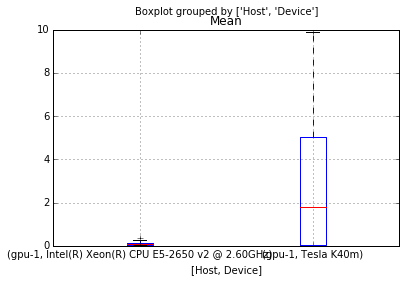

In [31]:
filtered.boxplot(column="Mean", by=["Host", "Device"])

In [32]:
q01 = device.Mean.quantile(0.01)

In [33]:
q25 = device.Mean.quantile(0.25)

In [34]:
q50 = device.Mean.quantile(0.50)

In [35]:
q75 = device.Mean.quantile(0.75)

In [36]:
q99 = device.Mean.quantile(0.99)

In [37]:
quantiles = pd.DataFrame({'Q01': q01, 'Q25': q25, 'Q50': q50, 'Q75': q75, 'Q99': q99})

In [38]:
quantiles

Q01  \
Query                                         Host  DeviceType Device                                                
grouped_aggregation_query_1                   gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.030939   
                                                    dgpu       Tesla K40m                                 0.063691   
projection-query-1-medium-selectivity         gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.061598   
                                                    dgpu       Tesla K40m                                 0.032674   
projection-query-2-high-selectivity           gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.044533   
                                                    dgpu       Tesla K40m                                 0.015832   
simple-aggregation-query-1-medium-selectivity gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.034392   
                                                    dgpu       Tesla K40m                                 0.007925   

                                                                                                               Q25  \
Query                                         Host  DeviceType Device                                                
grouped_aggregation_query_1                   gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.033881   
                                                    dgpu       Tesla K40m                                 1.312720   
projection-query-1-medium-selectivity         gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.081812   
                                                    dgpu       Tesla K40m                                 0.039311   
projection-query-2-high-selectivity           gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.050806   
                                                    dgpu       Tesla K40m                                 0.018703   
simple-aggregation-query-1-medium-selectivity gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.038913   
                                                    dgpu       Tesla K40m                                 0.008161   

                                                                                                               Q50  \
Query                                         Host  DeviceType Device                                                
grouped_aggregation_query_1                   gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.138178   
                                                    dgpu       Tesla K40m                                 2.369445   
projection-query-1-medium-selectivity         gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.111163   
                                                    dgpu       Tesla K40m                                 2.430882   
projection-query-2-high-selectivity           gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.085783   
                                                    dgpu       Tesla K40m                                 1.894506   
simple-aggregation-query-1-medium-selectivity gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.043602   
                                                    dgpu       Tesla K40m                                 0.009184   

                                                                                                               Q75  \
Query                                         Host  DeviceType Device                                                
grouped_aggregation_query_1                   gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz  0.252568   
                                                    dgpu       Tesla K40m                                 3.894505   
projection-query-1-medium-selectivity         gpu-1 cpu        Intel(R) Xeon(R) CPU E5-2650 v2 @

In [39]:
quantiles = quantiles.reset_index()

In [40]:
quantiles

,Query,Host,DeviceType,Device,Q01,Q25,Q50,Q75,Q99
0,grouped_aggregation_query_1,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,0.030939,0.033881,0.138178,0.252568,0.342323
1,grouped_aggregation_query_1,gpu-1,dgpu,Tesla K40m,0.063691,1.312720,2.369445,3.894505,8.276328
2,projection-query-1-medium-selectivity,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,0.061598,0.081812,0.111163,0.138674,0.234950
3,projection-query-1-medium-selectivity,gpu-1,dgpu,Tesla K40m,0.032674,0.039311,2.430882,5.816438,8.768683
4,projection-query-2-high-selectivity,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,0.044533,0.050806,0.085783,0.151987,0.241971
5,projection-query-2-high-selectivity,gpu-1,dgpu,Tesla K40m,0.015832,0.018703,1.894506,4.899868,9.722873
6,simple-aggregation-query-1-medium-selectivity,gpu-1,cpu,Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz,0.034392,0.038913,0.043602,0.049188,0.056294
7,simple-aggregation-query-1-medium-selectivity,gpu-1,dgpu,Tesla K40m,0.007925,0.008161,0.009184,0.010188,0.010369
